# India Air Quality Dataset 

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_hour.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_day.csv")
#data=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\city_day.csv")

In [3]:
data.shape

(1048488, 16)

In [4]:
station=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\stations.csv")

In [5]:
station.shape

(230, 5)

In [6]:
#df=data
df=pd.merge(data,station,on="StationId")
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,30-06-2020 23:00,24.25,40.75,1.23,10.82,6.78,8.75,0.61,11.12,31.77,0.12,1.10,0.30,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,30-06-2020 22:00,30.25,49.00,1.33,17.10,10.20,9.82,0.71,11.78,29.32,0.30,3.85,0.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,30-06-2020 21:00,24.50,46.50,2.02,18.85,11.70,10.25,0.74,12.85,34.98,0.38,2.55,0.28,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,30-06-2020 20:00,28.75,39.00,1.50,14.05,8.68,9.40,0.76,11.95,39.98,0.32,1.40,0.15,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,30-06-2020 19:00,27.25,35.50,1.83,12.40,8.05,9.10,0.66,12.75,50.35,0.17,0.90,0.10,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [7]:
df["City"]=df["City"].str.lower()

In [8]:
df.tail()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
1048483,DL032,01-02-2018 15:00,106.0,227.0,1.93,16.30,18.25,63.29,0.74,7.78,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048484,DL032,01-02-2018 14:00,123.0,269.0,1.70,16.08,17.75,62.74,0.72,6.72,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048485,DL032,01-02-2018 13:00,163.0,318.0,2.66,19.12,21.79,60.58,0.91,7.03,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048486,DL032,01-02-2018 12:00,229.0,453.0,5.58,26.74,32.30,57.65,1.20,11.75,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active
1048487,DL032,01-02-2018 11:00,259.0,504.0,NaN,NaN,146.80,9.43,0.39,0.80,NaN,NaN,NaN,NaN,NaN,NaN,"Rohini, Delhi - DPCC",delhi,Delhi,Active


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048488 entries, 0 to 1048487
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   StationId    1048488 non-null  object 
 1   Datetime     1048488 non-null  object 
 2   PM2.5        800121 non-null   float64
 3   PM10         705781 non-null   float64
 4   NO           817879 non-null   float64
 5   NO2          831375 non-null   float64
 6   NOx          855833 non-null   float64
 7   NH3          581748 non-null   float64
 8   CO           827438 non-null   float64
 9   SO2          664292 non-null   float64
 10  O3           798012 non-null   float64
 11  Benzene      701794 non-null   float64
 12  Toluene      672121 non-null   float64
 13  Xylene       213410 non-null   float64
 14  AQI          808992 non-null   float64
 15  AQI_Bucket   808992 non-null   object 
 16  StationName  1048488 non-null  object 
 17  City         1048488 non-null  object 
 18  St

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,800121.000000,705781.000000,817879.000000,831375.000000,855833.000000,581748.000000,827438.000000,664292.000000,798012.000000,701794.000000,672121.000000,213410.000000,808992.000000
mean,105.019131,201.526548,31.514517,43.682542,52.394115,35.917224,1.394412,14.910112,43.311444,3.276467,20.038358,2.232764,226.958824
std,101.431952,156.388572,59.492032,39.408620,68.463083,27.004742,2.117047,13.355241,61.673787,6.238386,37.994544,7.599092,133.207457
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,16.000000
25%,39.500000,89.810000,3.620000,18.150000,13.900000,19.270000,0.540000,6.620000,10.980000,0.240000,0.920000,0.000000,114.000000
50%,72.000000,159.150000,9.580000,31.890000,29.150000,30.730000,0.950000,11.600000,25.030000,1.550000,6.750000,0.230000,198.000000
75%,135.500000,268.390000,29.130000,56.560000,60.030000,45.980000,1.600000,18.780000,53.670000,4.150000,23.500000,1.630000,320.000000
max,1000.000000,1000.000000,500.000000,499.970000,500.000000,494.110000,50.000000,199.770000,997.000000,491.510000,499.800000,476.310000,1113.000000


In [11]:
df.shape

(1048488, 20)

In [12]:
num_col = list(df.select_dtypes(include='float').columns)

In [13]:
df.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status'],
      dtype='object')

<Axes: >

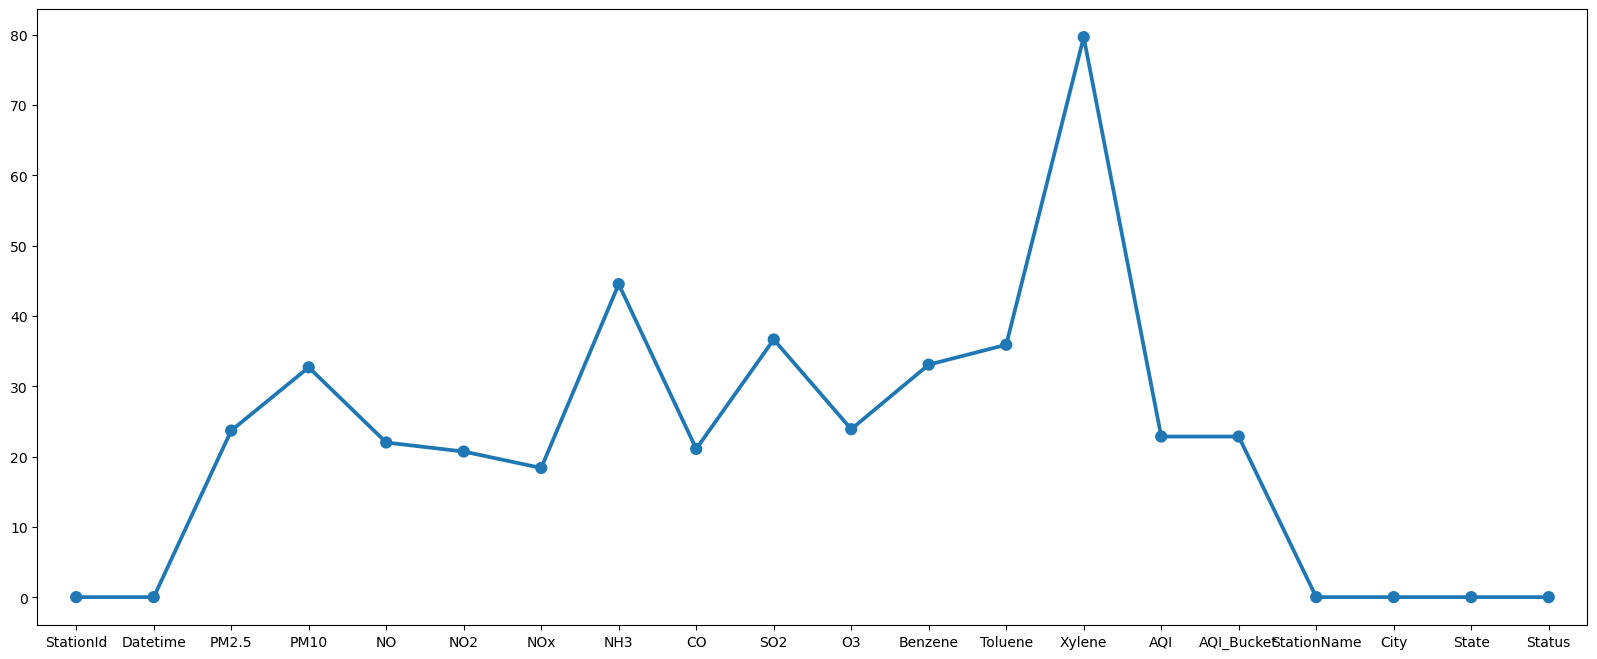

In [14]:
l1=[]
for i in df:
    l1.append(((df[str(i)].isnull().sum())/df.shape[0])*100)
l2=df.columns
plt.figure(figsize=(20,8))
sns.pointplot(x=l2,y=l1)

In [15]:
null_value_percent=pd.DataFrame(l1,index=l2)
null_value_percent

,0
StationId,0.000000
Datetime,0.000000
PM2.5,23.688111
PM10,32.685829
NO,21.994434
NO2,20.707247
NOx,18.374555
NH3,44.515531
CO,21.082740
SO2,36.642861


In [16]:
df.drop(["Benzene","Toluene","Xylene","NO"],axis=1,inplace=True)

In [17]:
df["StationId"].nunique()

42

In [18]:
# Station id wise empty
df_n=df.select_dtypes(exclude="object")
df_n["StationId"]=df["StationId"]
col=list(df_n.columns)
col.pop()
l5=[]
for i in col:
    l5.append(df.groupby(["StationId"])[i].mean().isnull().sum())
print(pd.DataFrame(l5,index=col))

        0
PM2.5   1
PM10    4
NO2     0
NOx     1
NH3    10
CO      1
SO2     8
O3      1
AQI     1


In [19]:
df["City"].value_counts()

delhi            907412
patna             63998
visakhapatnam     35040
amaravati         22776
guwahati          12000
chandigarh         7262
Name: City, dtype: int64

In [20]:
# City wise empty
df_n=df.select_dtypes(exclude=['object'])
df_n["City"]=df["City"]
col = list(df_n.columns)
col.pop()
l3=[]
for i in col:
    l3.append((df.groupby(["City"])[str(i)].mean().isnull().sum()))

null_val=pd.DataFrame(l3,index=col)
print(null_val)

       0
PM2.5  0
PM10   0
NO2    0
NOx    0
NH3    0
CO     0
SO2    0
O3     0
AQI    0


In [21]:
df.isnull().sum()

StationId           0
Datetime            0
PM2.5          248367
PM10           342707
NO2            217113
NOx            192655
NH3            466740
CO             221050
SO2            384196
O3             250476
AQI            239496
AQI_Bucket     239496
StationName         0
City                0
State               0
Status              0
dtype: int64

In [22]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,30-06-2020 23:00,24.25,40.75,10.82,6.78,8.75,0.61,11.12,31.77,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
1,AP001,30-06-2020 22:00,30.25,49.00,17.10,10.20,9.82,0.71,11.78,29.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2,AP001,30-06-2020 21:00,24.50,46.50,18.85,11.70,10.25,0.74,12.85,34.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
3,AP001,30-06-2020 20:00,28.75,39.00,14.05,8.68,9.40,0.76,11.95,39.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
4,AP001,30-06-2020 19:00,27.25,35.50,12.40,8.05,9.10,0.66,12.75,50.35,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [23]:
df["Date"]=pd.to_datetime(data["Datetime"])
#df["Date"]=pd.to_datetime(data["Date"])

In [24]:
df.index = df["Date"]
df.drop(["Date"],axis=1,inplace=True)

In [25]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,StationName,City,State,Status
Date,,,,,,,,,,,,,,,,
2020-06-30 23:00:00,AP001,30-06-2020 23:00,24.25,40.75,10.82,6.78,8.75,0.61,11.12,31.77,55.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 22:00,30.25,49.00,17.10,10.20,9.82,0.71,11.78,29.32,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 21:00,24.50,46.50,18.85,11.70,10.25,0.74,12.85,34.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 20:00,28.75,39.00,14.05,8.68,9.40,0.76,11.95,39.98,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active
2020-06-30 23:00:00,AP001,30-06-2020 19:00,27.25,35.50,12.40,8.05,9.10,0.66,12.75,50.35,78.0,Satisfactory,"Secretariat, Amaravati - APPCB",amaravati,Andhra Pradesh,Active


In [26]:
df.shape

(1048488, 16)

In [27]:
df["City"].nunique()

6

In [28]:
df=df.drop(["Datetime"],axis=1)

In [29]:
num_col=df.select_dtypes(include="float64")

In [30]:
num_col["StationId"]=df["StationId"]

In [31]:
grouped_df=num_col.groupby(['StationId']).mean

In [32]:
grouped_df

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001F5B8AD8490>>

In [33]:
grouped_df=df.groupby(['StationId']).mean()
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
StationId,,,,,,,,,
AP001,38.489207,77.011887,21.938609,15.221468,12.085474,0.618698,14.096422,38.147140,95.602137
AP005,47.852818,106.753808,37.359742,25.042680,10.984300,0.733717,12.748096,38.095152,117.732337
AS001,61.773630,113.875647,13.604696,44.478980,10.876328,0.737507,14.578483,25.000051,140.255729
BR005,66.200272,113.634368,30.775098,27.636924,20.422384,0.549864,4.655874,38.122025,127.763033
BR006,38.367786,139.785604,9.687173,9.756939,13.284629,0.637212,7.389969,6.487256,127.923235
BR007,129.733411,191.960407,39.807684,41.537379,33.641320,1.606444,24.794454,40.469557,249.131932
BR008,51.578018,128.008993,32.619571,48.721934,31.785469,0.899926,5.190413,12.187467,126.148966
BR009,49.626374,110.208921,68.527769,64.803223,18.824959,0.924979,11.840733,28.580381,135.837477
BR010,68.493761,118.457214,20.614634,142.315267,13.763772,1.859793,13.720928,39.903506,204.271090


In [34]:
grouped_df=df.groupby('StationId')
df_filled=grouped_df.transform(lambda x :x.fillna(x.mean()))
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2020-06-30 23:00:00,24.25,40.75,10.820000,6.78,8.75,0.61,11.12,31.770000,55.000000
2020-06-30 23:00:00,30.25,49.00,17.100000,10.20,9.82,0.71,11.78,29.320000,78.000000
2020-06-30 23:00:00,24.50,46.50,18.850000,11.70,10.25,0.74,12.85,34.980000,78.000000
2020-06-30 23:00:00,28.75,39.00,14.050000,8.68,9.40,0.76,11.95,39.980000,78.000000
2020-06-30 23:00:00,27.25,35.50,12.400000,8.05,9.10,0.66,12.75,50.350000,78.000000
...,...,...,...,...,...,...,...,...,...
2015-01-01 02:00:00,106.00,227.00,16.300000,18.25,63.29,0.74,7.78,49.739503,305.642159
2015-01-01 01:00:00,123.00,269.00,16.080000,17.75,62.74,0.72,6.72,49.739503,305.642159
2015-01-01 01:00:00,163.00,318.00,19.120000,21.79,60.58,0.91,7.03,49.739503,305.642159


In [35]:
df_filled.isnull().sum()

PM2.5     37235
PM10     178161
NO2           0
NOx       37235
NH3      322314
CO        37235
SO2      196880
O3        48191
AQI       37235
dtype: int64

In [36]:
groupedcity_df=df.groupby("City")

In [37]:
df_filled=groupedcity_df.transform(lambda x:x.fillna(x.mean()))

In [38]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

for i in num_col:
    pm_mean=df_filled[i].mean()
    df_filled[i]=df_filled[i].fillna(pm_mean)

In [39]:
df_temp=df.select_dtypes(include="float64")
num_col=df_temp.columns

In [40]:
df_filled.shape

(1048488, 9)

In [41]:
df_filled.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [42]:
def outlier_removal(data,k=1):
    mean_value=data.mean()
    data=data.to_list()
    
    q3=np.percentile(data,75)
    q1=np.percentile(data,25)

    iqr=q3-q1

    lower_range=q1-(iqr*1.5)
    higher_range=q3+(iqr*1.5)
    
    
    for i,j in enumerate(data):
        if (j<=lower_range or j>=higher_range):
            data[i]=mean_value
    return data

In [43]:
for j in range(0,4):
    for i in num_col:
        df_filled[i]=outlier_removal(df_filled[i])

In [44]:
num_col

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

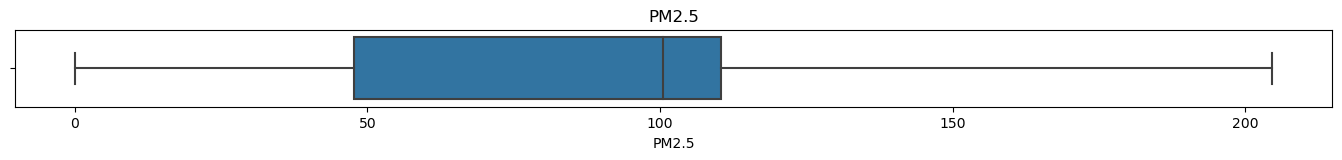

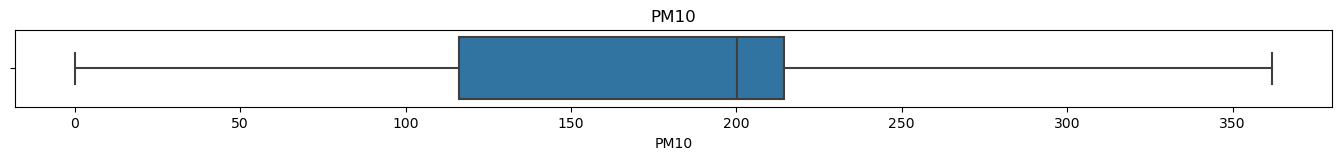

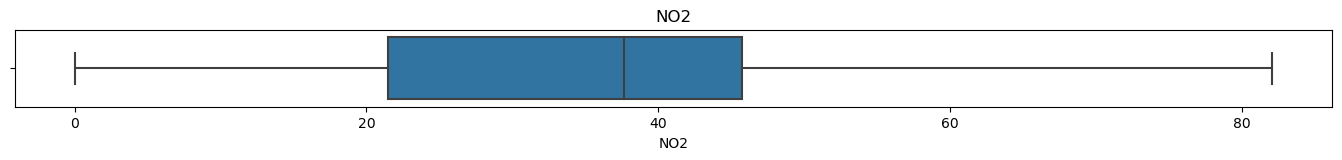

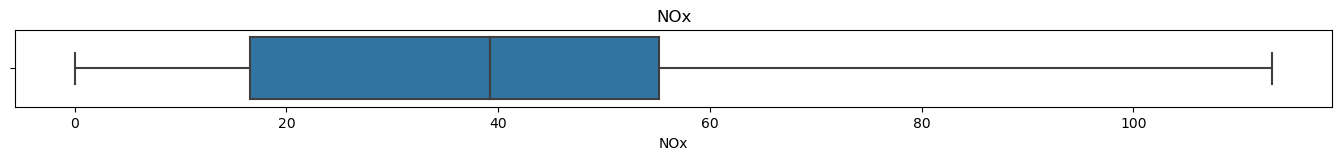

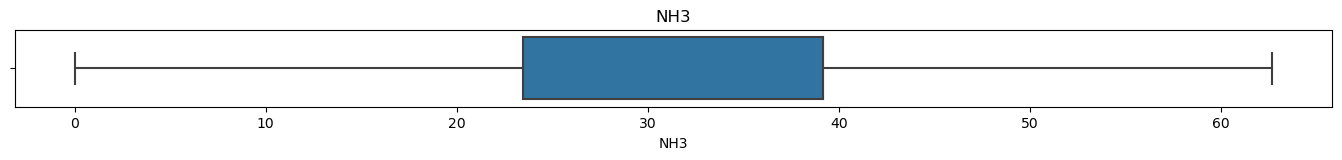

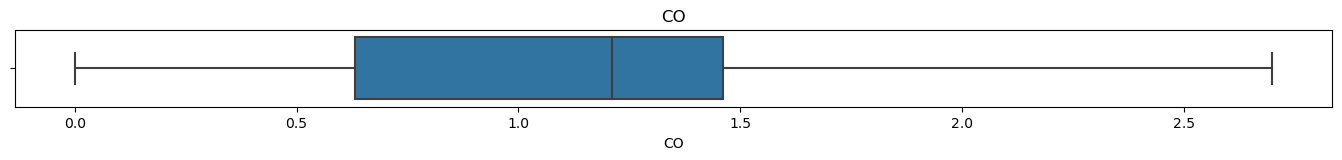

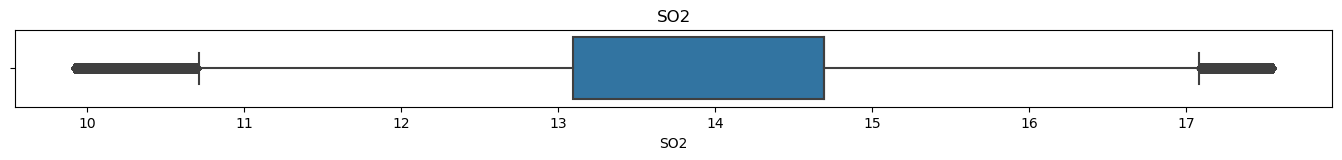

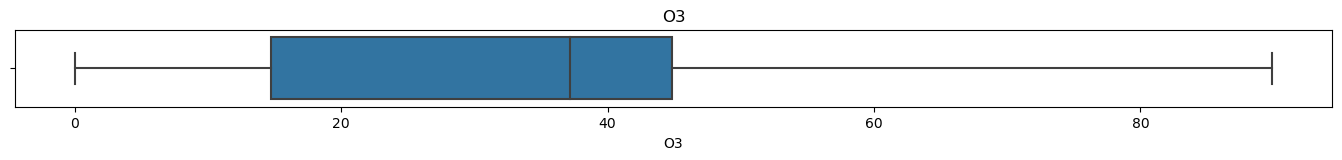

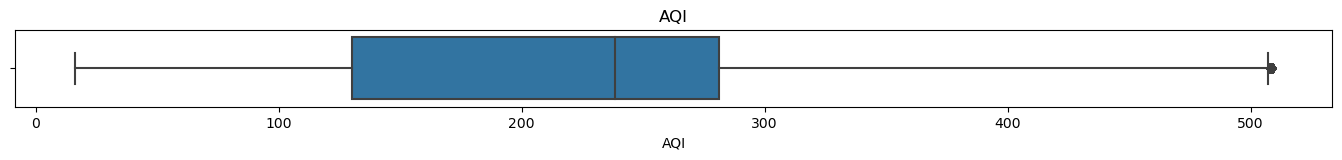

In [45]:
#Printing boxplot for each numerical column present in the data set
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_filled, x=i)
    plt.title(i)
plt.show()

In [46]:
df_filled["city"]=df["City"]
cities=list(df_filled["city"].unique())
cities

['amaravati', 'visakhapatnam', 'guwahati', 'patna', 'chandigarh', 'delhi']

In [47]:
df_filled

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,city
Date,,,,,,,,,,
2020-06-30 23:00:00,24.250000,40.750000,10.820000,6.780000,8.750000,0.61,11.120000,31.770000,55.000000,amaravati
2020-06-30 23:00:00,30.250000,49.000000,17.100000,10.200000,9.820000,0.71,11.780000,29.320000,78.000000,amaravati
2020-06-30 23:00:00,24.500000,46.500000,18.850000,11.700000,10.250000,0.74,12.850000,34.980000,78.000000,amaravati
2020-06-30 23:00:00,28.750000,39.000000,14.050000,8.680000,9.400000,0.76,11.950000,39.980000,78.000000,amaravati
2020-06-30 23:00:00,27.250000,35.500000,12.400000,8.050000,9.100000,0.66,12.750000,50.350000,78.000000,amaravati
...,...,...,...,...,...,...,...,...,...,...
2015-01-01 02:00:00,106.000000,227.000000,16.300000,18.250000,36.036565,0.74,13.626803,44.809586,238.548453,delhi
2015-01-01 01:00:00,123.000000,269.000000,16.080000,17.750000,36.036565,0.72,13.626803,44.809586,238.548453,delhi
2015-01-01 01:00:00,163.000000,318.000000,19.120000,21.790000,60.580000,0.91,13.626803,44.809586,238.548453,delhi


In [48]:
df_filled.shape
df_filled["city"]=df["City"]

In [49]:
df_filled["city"]=df["City"].str.lower()

In [50]:
dist=input("Give the district name or number to predict Air Quality in above given districts")

def city(dist):
    if (int(dist)==1) or (str(dist).lower()=="delhi"):
        city_name="delhi"
        return city_name
    elif (int(dist)==2) or (str(dist).lower()=="amaravati"):
        city_name ="amaravati"
        return city_name
    elif (int(dist)==3) or (str(dist).lower()=="guwahati"):
        city_name="guwahati"
        return city_name
    elif (int(dist)==4) or (str(dist).lower()=="patna"):
        city_name="patna"
        return city_name
    elif (int(dist)==5 or (str(dist).lower()=="chandigarh")):
        city_name="chandigarh"
        return city_name
    elif (int(dist)==6) or (str(dist).lower()=="visakhapatnam"):
        city_name="visakhapatnam"
        return city_name
    else:
        print("Specify right index")
        
city_name=city(dist)

Give the district name or number to predict Air Quality in above given districts1


## Delhi Time series Data

In [222]:
city_name="delhi"

In [223]:
groupedcity_df=df_filled.groupby("city")

In [224]:
delhi=groupedcity_df.get_group((city_name.lower()))
delhi.drop(["city"],axis=1,inplace=True)

In [225]:
delhi.head()

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2020-03-02 17:00:00,81.0,181.75,15.30,7.95,32.55,0.78,10.680000,7.72,107.0
2020-03-02 17:00:00,57.0,166.00,10.77,5.45,27.20,0.83,10.150000,10.07,106.0
2020-03-02 17:00:00,42.5,152.25,10.12,4.95,28.02,0.57,13.626803,11.50,105.0
2020-03-02 17:00:00,39.0,137.00,8.80,4.25,29.40,0.57,13.626803,13.10,104.0
2020-03-02 17:00:00,40.5,130.75,8.60,4.33,36.58,0.55,13.626803,13.68,102.0


In [227]:
start_date="2018-01-01"
end_date="2019-12-31"
mask = (delhi.index >= start_date) & (delhi.index <= end_date)
selected_data =delhi.iloc[mask]
#selected_data = delhi[delhi.index <= end_date]
selected_data.shape

(579032, 9)

In [228]:
delhi_df = selected_data.resample('H').mean()
delhi_df.shape

(17497, 9)

In [229]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

imputed_data = knn_imputer.fit_transform(delhi_df)

In [230]:
delhi_df.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [122]:
delhi_imputed = pd.DataFrame(imputed_data, columns=delhi.columns,index=delhi_df.index)

In [123]:
delhi_imputed.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [124]:
delhi_imputed

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-01-01 00:00:00,59.522133,214.548929,34.016372,23.920943,47.429934,0.804968,13.840433,44.809586,197.581625
2019-01-01 01:00:00,55.344788,214.548929,34.486299,25.570965,42.716822,0.668928,14.067806,44.809586,73.529412
2019-01-01 02:00:00,51.595588,214.548929,41.334392,38.670000,46.959982,0.709412,14.029349,44.809586,91.176471
2019-01-01 03:00:00,100.204781,214.548929,46.577628,44.556456,46.051343,1.102549,14.290019,44.809586,169.852941
2019-01-01 04:00:00,56.140629,214.548929,33.631471,23.688824,47.349706,0.688235,14.371846,44.809586,185.882353
...,...,...,...,...,...,...,...,...,...
2019-12-30 20:00:00,110.451391,214.548929,45.707079,55.176412,39.170971,1.461780,14.690247,44.809586,238.548453
2019-12-30 21:00:00,110.451391,214.548929,45.707079,55.176412,39.170971,1.461780,14.690247,44.809586,238.548453
2019-12-30 22:00:00,110.451391,214.548929,45.707079,55.176412,39.170971,1.461780,14.690247,44.809586,238.548453


In [126]:
delhi_df=delhi_imputed

### Implementing Machine Learning Model for Delhi Data

In [392]:
# Augmented Dickey Fuller Test
import statsmodels.api
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [317]:
# Stability Test
def stability_test(series):
    result=statsmodels.tsa.stattools.adfuller(series,autolag="AIC")
    #print(result)
    if result[1]>=0.05:
        print("data is not stationary")
    else:
        print("procede data is Stationary")

In [318]:
for i in num_col:
    print(f"{i}")
    stability_test(delhi_df[i])

PM2.5
procede data is Stationary
PM10
procede data is Stationary
NO2
procede data is Stationary
NOx
procede data is Stationary
NH3
procede data is Stationary
CO
procede data is Stationary
SO2
procede data is Stationary
O3
procede data is Stationary
AQI
procede data is Stationary


In [401]:
# train test data split
tests=24
test=delhi_df[-tests:]
train=delhi_df[:-tests]

In [402]:
train

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2018-01-01 00:00:00,136.302280,214.548929,46.059166,42.556965,39.170971,1.496973,13.665208,41.204709,254.753879
2018-01-01 01:00:00,120.905561,214.548929,18.845263,13.789474,39.170971,1.461780,13.441572,13.088399,421.684211
2018-01-01 02:00:00,157.069474,214.548929,20.474211,17.048421,39.170971,1.461780,13.204701,24.502457,354.473684
2018-01-01 03:00:00,143.034089,214.548929,27.971053,24.433684,39.170971,1.495371,13.721442,13.904693,320.894737
2018-01-01 04:00:00,129.326586,214.548929,28.718421,20.390526,39.170971,1.452119,13.076614,22.628882,326.052632
...,...,...,...,...,...,...,...,...,...
2019-12-29 20:00:00,98.946996,212.120773,46.163008,53.306672,24.535801,1.579402,13.955899,44.663854,371.282051
2019-12-29 21:00:00,109.727245,254.106868,43.643307,49.877186,25.539143,1.668291,13.320454,32.952123,262.358974
2019-12-29 22:00:00,116.165391,284.612128,51.475998,57.674690,32.030080,1.623106,13.526213,29.459449,304.128205


In [403]:
test

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,
2019-12-30 01:00:00,50.573399,176.333333,35.533077,28.644615,5.470256,1.676667,14.472930,23.178718,163.923077
2019-12-30 02:00:00,57.482821,158.465897,37.474615,42.282308,8.143590,1.690256,14.568198,15.211795,133.589744
2019-12-30 03:00:00,54.871795,166.620981,41.052308,46.307949,9.565128,1.672878,13.946521,19.683846,147.871795
2019-12-30 04:00:00,77.969345,171.270485,50.951421,51.054840,17.283615,1.852923,13.387564,22.995630,205.820513
2019-12-30 05:00:00,77.097794,163.903032,30.533653,28.314359,5.365128,1.659744,13.240993,19.639466,277.307692
2019-12-30 06:00:00,96.712074,239.213465,44.010349,49.458620,24.610630,1.519260,13.811610,33.720354,210.206820
2019-12-30 07:00:00,98.405457,246.079731,41.384743,44.127561,10.030256,1.756581,13.276651,21.132821,333.641026
2019-12-30 08:00:00,128.899081,210.506941,47.952077,58.735442,27.117692,1.950769,13.300696,20.792286,405.242995
2019-12-30 09:00:00,133.675359,204.995139,45.934886,57.922995,14.418718,1.702308,13.011714,21.465897,406.665195


In [404]:
test_aqi=test["AQI"]
test_aqi

Date
2019-12-30 01:00:00    163.923077
2019-12-30 02:00:00    133.589744
2019-12-30 03:00:00    147.871795
2019-12-30 04:00:00    205.820513
2019-12-30 05:00:00    277.307692
2019-12-30 06:00:00    210.206820
2019-12-30 07:00:00    333.641026
2019-12-30 08:00:00    405.242995
2019-12-30 09:00:00    406.665195
2019-12-30 10:00:00    272.873302
2019-12-30 11:00:00    231.564103
2019-12-30 12:00:00    194.000000
2019-12-30 13:00:00    291.256410
2019-12-30 14:00:00    304.666667
2019-12-30 15:00:00    168.629448
2019-12-30 16:00:00    234.261432
2019-12-30 17:00:00    230.501295
2019-12-30 18:00:00    238.548453
2019-12-30 19:00:00    238.548453
2019-12-30 20:00:00    238.548453
2019-12-30 21:00:00    238.548453
2019-12-30 22:00:00    238.548453
2019-12-30 23:00:00    238.548453
2019-12-31 00:00:00    238.548453
Freq: H, Name: AQI, dtype: float64

### ARIMA Model

In [405]:
from statsmodels.tsa.arima.model import ARIMA

In [406]:
arima_pred=pd.DataFrame()
for i in num_col:
    model=ARIMA(train[i],order=(1,0,0))
    res=model.fit()
    #print(res.summary())
    
    #Prediction in Dataframe
    arima_pred[i]=res.predict(start="2019-12-30 01:00:00",end="2019-12-31 00:00:00")    

In [407]:
arima_pred

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI
2019-12-30 01:00:00,71.098945,230.406174,44.635874,43.865412,16.634793,1.595616,13.515302,19.580976,212.281267
2019-12-30 02:00:00,74.556839,222.438245,43.561700,43.246551,19.391055,1.529432,13.629689,22.053511,215.317882
2019-12-30 03:00:00,77.420203,216.029931,42.646700,42.718824,21.740696,1.472882,13.721546,24.059633,217.798544
2019-12-30 04:00:00,79.791257,210.875958,41.867288,42.268811,23.743702,1.424565,13.795309,25.687325,219.825040
2019-12-30 05:00:00,81.754645,206.730806,41.203372,41.885066,25.451211,1.383282,13.854543,27.007974,221.480518
2019-12-30 06:00:00,83.380461,203.397012,40.637836,41.557833,26.906817,1.348008,13.902110,28.079498,222.832907
2019-12-30 07:00:00,84.726743,200.715763,40.156104,41.278788,28.147682,1.317870,13.940308,28.948894,223.937696
2019-12-30 08:00:00,85.841553,198.559333,39.745756,41.040835,29.205486,1.292119,13.970981,29.654288,224.840218
2019-12-30 09:00:00,86.764690,196.824995,39.396215,40.837923,30.107236,1.270116,13.995613,30.226619,225.577502
2019-12-30 10:00:00,87.529108,195.430131,39.098470,40.664893,30.875954,1.251317,14.015393,30.690987,226.179803


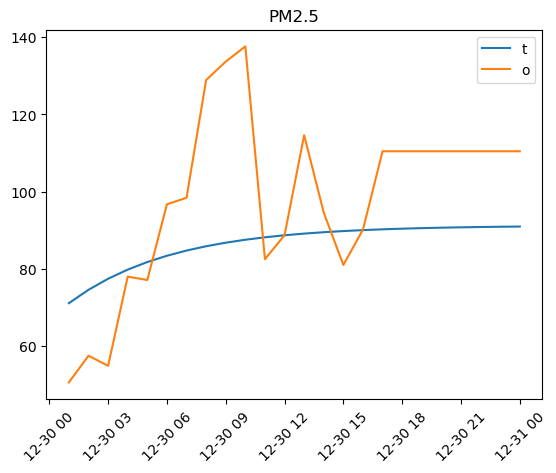

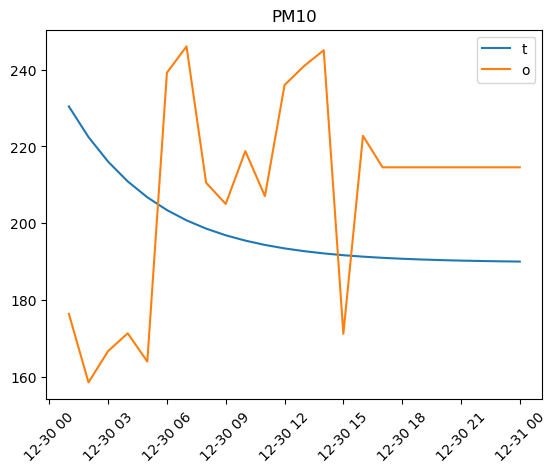

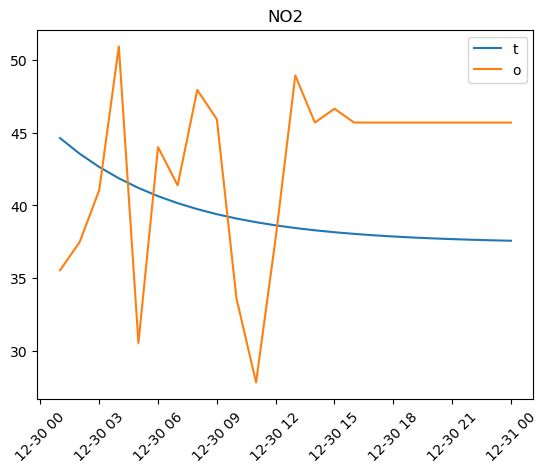

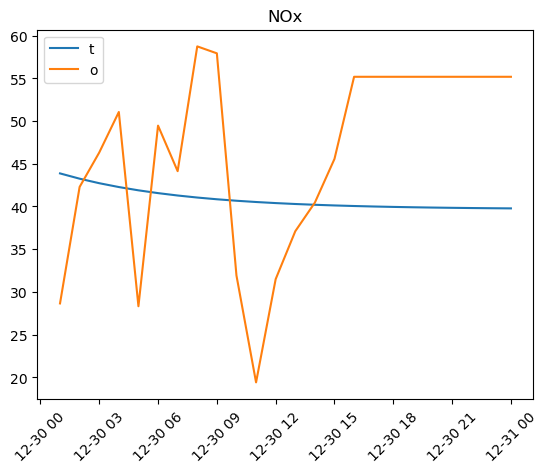

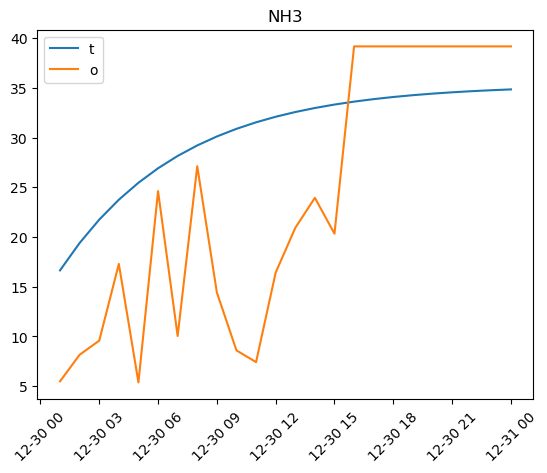

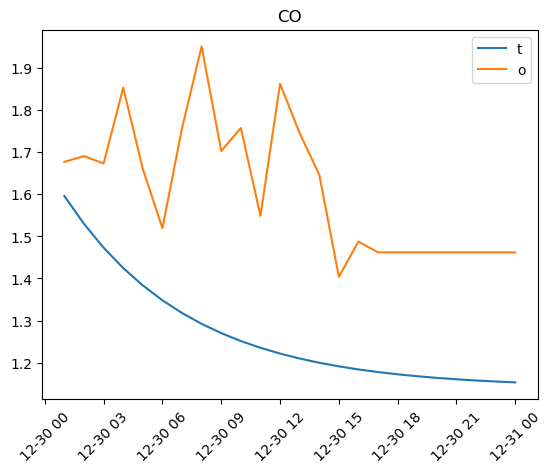

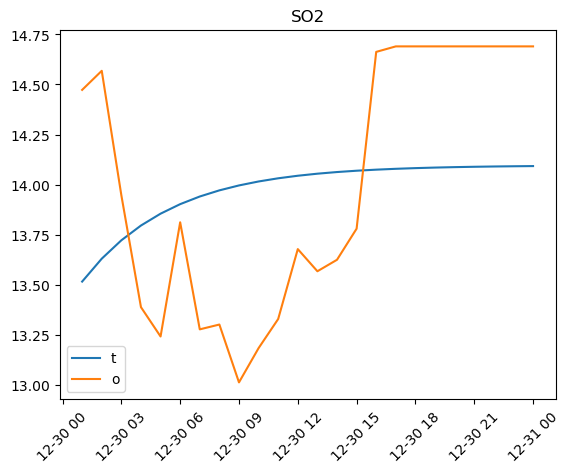

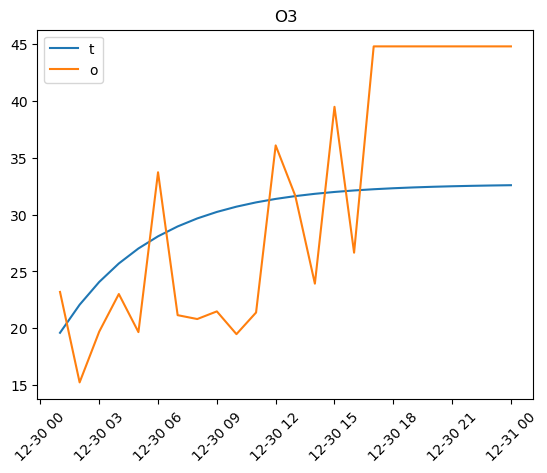

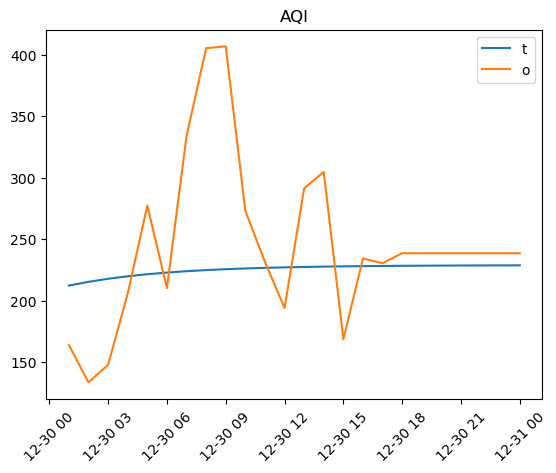

In [408]:
for i in num_col:
    plt.plot(arima_pred[i],label="predicted")
    plt.plot(test[i],label="test")
    plt.title(i)
    plt.legend("topright")
    plt.xticks(rotation=45)#plt.xticks(rotation=40)
    plt.show()

In [431]:
arima_mape=[]
for i in num_col:
    ar_m=mape(arima_pred[i],test[i])
    arima_mape.append(ar_m)
    
arima_mape_df=pd.DataFrame({"index":num_col,
               "arima_mape":arima_mape})

print(arima_mape_df)
arima_mape=arima_mape_df.arima_mape.mean()

   index  arima_mape
0  PM2.5   18.218831
1   PM10   32.361786
2    NO2    7.134096
3    NOx   11.373145
4    NH3    9.941404
5     CO    0.341274
6    SO2    0.586784
7     O3    8.395186
8    AQI   46.536965


In [410]:
print(f"\nOverall average Mean Average Percentage Error in ARIMA Model: {arima_mape}\n")


Overall average Mean Average Percentage Error in ARIMA Model: 0.22100358728185343



In [411]:
arima_aqi=arima_pred["AQI"]

In [412]:
arima_aqi

2019-12-30 01:00:00    212.281267
2019-12-30 02:00:00    215.317882
2019-12-30 03:00:00    217.798544
2019-12-30 04:00:00    219.825040
2019-12-30 05:00:00    221.480518
2019-12-30 06:00:00    222.832907
2019-12-30 07:00:00    223.937696
2019-12-30 08:00:00    224.840218
2019-12-30 09:00:00    225.577502
2019-12-30 10:00:00    226.179803
2019-12-30 11:00:00    226.671833
2019-12-30 12:00:00    227.073780
2019-12-30 13:00:00    227.402138
2019-12-30 14:00:00    227.670379
2019-12-30 15:00:00    227.889509
2019-12-30 16:00:00    228.068521
2019-12-30 17:00:00    228.214758
2019-12-30 18:00:00    228.334222
2019-12-30 19:00:00    228.431814
2019-12-30 20:00:00    228.511539
2019-12-30 21:00:00    228.576668
2019-12-30 22:00:00    228.629872
2019-12-30 23:00:00    228.673336
2019-12-31 00:00:00    228.708842
Freq: H, Name: AQI, dtype: float64

### VAR Model

In [413]:
model=statsmodels.tsa.vector_ar.var_model.VAR(train)

In [414]:
results=model.fit(24)

In [415]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Aug, 2023
Time:                     01:58:40
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    29.3290
Nobs:                     17449.0    HQIC:                   28.7460
Log likelihood:          -469175.    FPE:                2.29035e+12
AIC:                      28.4597    Det(Omega_mle):     2.04924e+12
--------------------------------------------------------------------
Results for equation PM2.5
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            10.515115         3.840256            2.738           0.006
L1.PM2.5          0.569753         0.011334           50.268           0.000
L1.PM10           0.033977         0.006013            5.651           0.000

In [416]:
lagged_Values = train.values[-24:]

In [417]:
pred=results.forecast(y=lagged_Values,steps=24)

In [418]:
var_predicted=pd.DataFrame(pred,columns=num_col)
var_predicted.index=test.index
var_predicted["Act_AQI"]=test["AQI"]
var_predicted

,PM2.5,PM10,NO2,NOx,NH3,CO,SO2,O3,AQI,Act_AQI
Date,,,,,,,,,,
2019-12-30 01:00:00,78.450723,237.631848,44.503640,43.346606,16.910181,1.604551,13.435436,23.929497,239.614213,163.923077
2019-12-30 02:00:00,84.041387,225.928828,47.801339,48.689942,20.348604,1.599623,13.563970,25.483970,247.836171,133.589744
2019-12-30 03:00:00,85.750634,221.955729,46.201655,48.780060,21.109677,1.598596,13.712866,25.319057,253.620812,147.871795
2019-12-30 04:00:00,83.766719,219.338748,45.934468,48.246389,21.216881,1.567099,13.604258,27.393274,247.295982,205.820513
2019-12-30 05:00:00,85.160374,216.591291,44.659905,47.817339,22.163790,1.563294,13.621564,27.744955,242.417685,277.307692
2019-12-30 06:00:00,83.796513,213.329957,44.869831,49.311899,22.914454,1.559733,13.658309,28.682334,243.510319,210.206820
2019-12-30 07:00:00,84.302351,205.120280,43.138920,47.382049,23.483118,1.532100,13.517301,26.544252,239.955103,333.641026
2019-12-30 08:00:00,81.454265,206.271277,43.393580,47.462504,23.612121,1.541688,13.581617,26.008018,243.527404,405.242995
2019-12-30 09:00:00,83.649628,204.510159,43.588345,46.538613,24.179841,1.523770,13.552133,27.514653,241.925638,406.665195


In [419]:
#Residual collection 
test_model=statsmodels.tsa.vector_ar.var_model.VAR(test)

In [420]:
#test_result=test_model.fit()
#test_result.summary()

In [421]:
#residuals = test_result.resid
#var_residual=residuals["AQI"]
#var_residual.shape

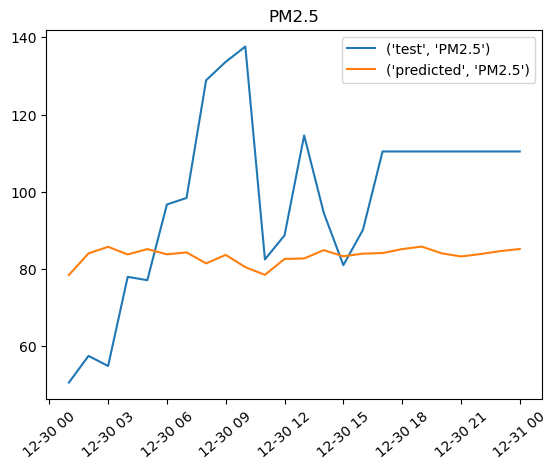

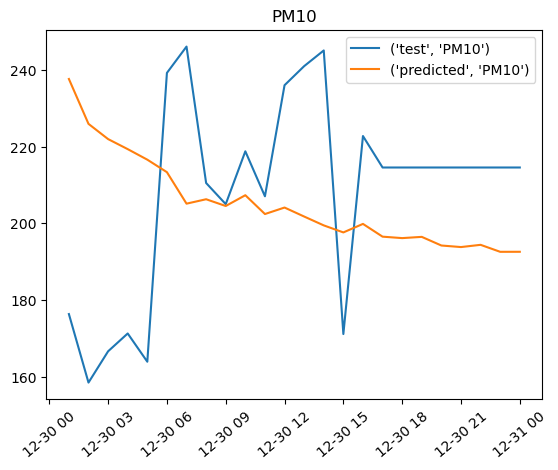

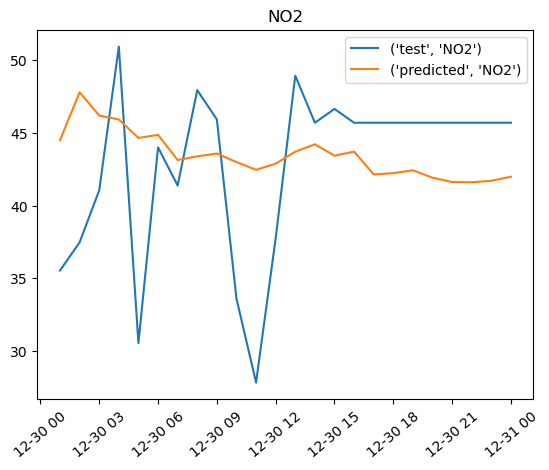

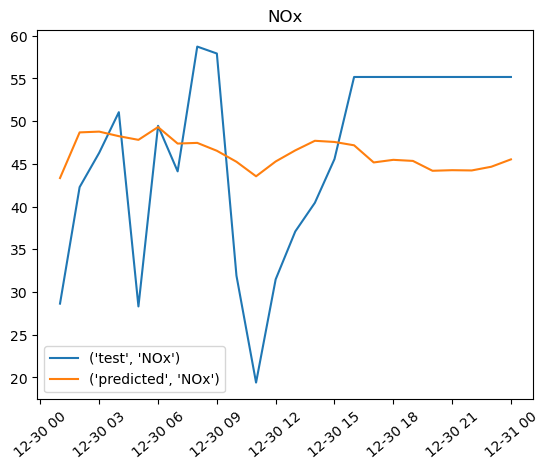

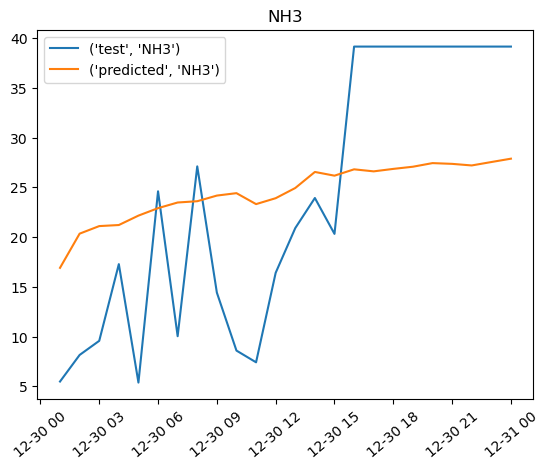

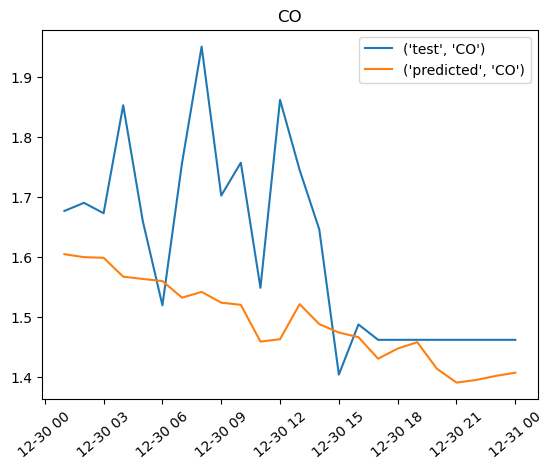

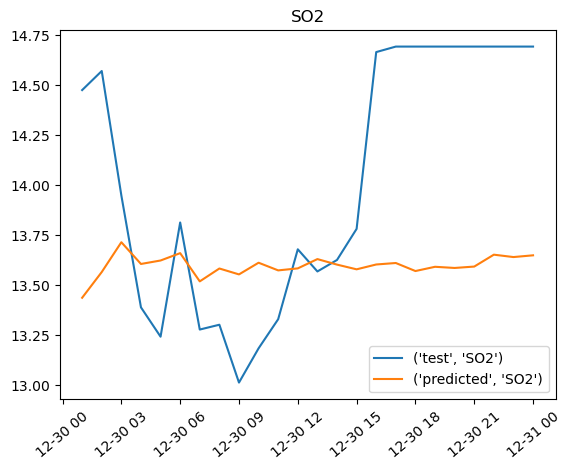

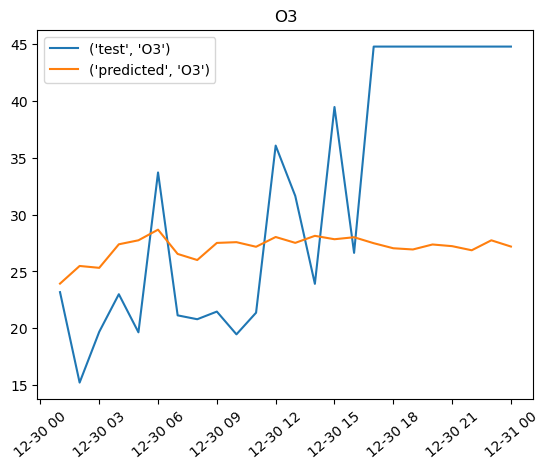

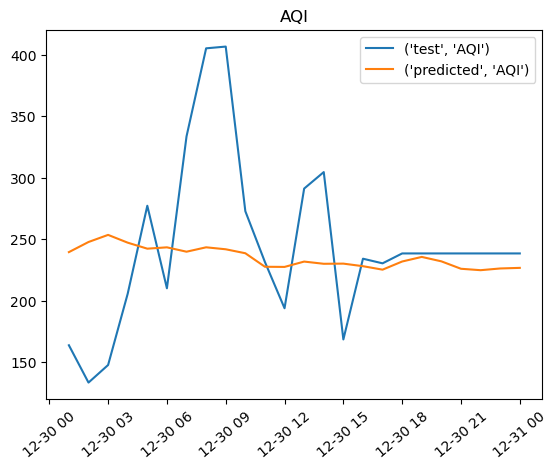

In [422]:
for i in num_col:
    plt.plot(test[i],label=("test", i))
    plt.plot(var_predicted[i],label=("predicted", i))
    plt.title(i)
    plt.legend()
    plt.xticks(rotation=40)
    plt.show()

In [423]:
num_col

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [430]:
l1=[]
l2=[]
for i in num_col:
    m=mape(var_predicted[i],test[i])
    l1.append(i)
    l2.append(m)
ovrl_mape=pd.DataFrame({"index":l1,
                        "mape":l2})
ovrl_mape=pd.DataFrame(ovrl_mape)
print(ovrl_mape)
var_mape=ovrl_mape["mape"].mean()
print(f"\n\nOverall average in VAR Model:{var_mape}")

   index       mape
0  PM2.5  22.851164
1   PM10  29.099338
2    NO2   5.174861
3    NOx   9.687501
4    NH3  10.157787
5     CO   0.125925
6    SO2   0.618509
7     O3   9.784761
8    AQI  48.736624


Overall average in VAR Model:15.137385463744714


In [425]:
var_aqi=var_predicted["AQI"]
var_aqi

Date
2019-12-30 01:00:00    239.614213
2019-12-30 02:00:00    247.836171
2019-12-30 03:00:00    253.620812
2019-12-30 04:00:00    247.295982
2019-12-30 05:00:00    242.417685
2019-12-30 06:00:00    243.510319
2019-12-30 07:00:00    239.955103
2019-12-30 08:00:00    243.527404
2019-12-30 09:00:00    241.925638
2019-12-30 10:00:00    238.701354
2019-12-30 11:00:00    227.714376
2019-12-30 12:00:00    227.592743
2019-12-30 13:00:00    231.931397
2019-12-30 14:00:00    230.133643
2019-12-30 15:00:00    230.268637
2019-12-30 16:00:00    228.180599
2019-12-30 17:00:00    225.362447
2019-12-30 18:00:00    231.989166
2019-12-30 19:00:00    235.717943
2019-12-30 20:00:00    232.120712
2019-12-30 21:00:00    226.084008
2019-12-30 22:00:00    224.932253
2019-12-30 23:00:00    226.328843
2019-12-31 00:00:00    226.815233
Freq: H, Name: AQI, dtype: float64

## Results of ARIMA & VAR Model 

In [432]:
print(arima_mape_df)

   index  arima_mape
0  PM2.5   18.218831
1   PM10   32.361786
2    NO2    7.134096
3    NOx   11.373145
4    NH3    9.941404
5     CO    0.341274
6    SO2    0.586784
7     O3    8.395186
8    AQI   46.536965


In [433]:
print(f"\nARIMA Model\nOverall Mean Average Percentage Error : {arima_mape}\n")


ARIMA Model
Overall Mean Average Percentage Error : 14.987719005217123



In [434]:
print(ovrl_mape)

   index       mape
0  PM2.5  22.851164
1   PM10  29.099338
2    NO2   5.174861
3    NOx   9.687501
4    NH3  10.157787
5     CO   0.125925
6    SO2   0.618509
7     O3   9.784761
8    AQI  48.736624


In [435]:
print(f"\nVAR Model\nOverall Mean Abs Percentage Error:{var_mape}")


VAR Model
Overall Mean Abs Percentage Error:15.137385463744714


## XG Boosting

In [213]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape

In [214]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols = list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
     cols.append(df.shift(i))
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
     cols.append(df.shift(-i))
 # put it all together
     agg = concat(cols, axis=1)
 # drop rows with NaN values
 if dropnan:
     agg.dropna(inplace=True)
 return agg.values

In [215]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
 return data[:-n_test, :], data[-n_test:, :]

In [216]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
 # transform list into array
 train = asarray(train)
 # split into input and output columns
 trainX, trainy = train[:, :-1], train[:, -1]
 # fit model
 model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
 model.fit(trainX, trainy)
 # make a one-step prediction
 yhat = model.predict(asarray([testX]))
 return yhat[0]
 

In [217]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
 predictions = list()
 # split dataset
 train, test = train_test_split(data, n_test)
 # seed history with training dataset
 history = [x for x in train]
 # step over each time-step in the test set
 for i in range(len(test)):
 # split test row into input and output columns
     testX, testy = test[i, :-1], test[i, -1]
 # fit model on history and make a prediction
     yhat = xgboost_forecast(history, testX)
 # store forecast in list of predictions
     predictions.append(yhat)
 # add actual observation to history for the next loop
     history.append(test[i])
 # summarize progress
     print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
 # estimate prediction error
 error = mape(test[:, -1], predictions)
 return error, test[:, -1], predictions


In [231]:
dataframe=pd.DataFrame(delhi_df["AQI"])
# load the dataset
series = dataframe
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=24)

(17491, 7)

In [232]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 24)
print('MAE: %.3f' % mae)

>expected=163.9, predicted=211.1
>expected=133.6, predicted=193.9
>expected=147.9, predicted=120.0
>expected=205.8, predicted=174.0
>expected=277.3, predicted=177.4
>expected=210.2, predicted=264.7
>expected=333.6, predicted=210.7
>expected=405.2, predicted=336.0
>expected=406.7, predicted=365.6
>expected=272.9, predicted=382.6
>expected=231.6, predicted=309.1
>expected=194.0, predicted=293.9
>expected=291.3, predicted=254.3
>expected=304.7, predicted=309.5
>expected=168.6, predicted=338.0
>expected=234.3, predicted=150.5
>expected=230.5, predicted=295.1
>expected=238.5, predicted=253.2
>expected=238.5, predicted=246.0
>expected=238.5, predicted=224.5
>expected=238.5, predicted=231.6
>expected=238.5, predicted=229.7
>expected=238.5, predicted=238.6
>expected=238.5, predicted=238.3
MAE: 0.233


In [233]:
xgbt_mape=mape(y,yhat)
xgbt_mape

0.23325111109459665

In [251]:
y

array([163.92307692, 133.58974359, 147.87179487, 205.82051282,
       277.30769231, 210.20681977, 333.64102564, 405.24299488,
       406.66519462, 272.87330183, 231.56410256, 194.        ,
       291.25641026, 304.66666667, 168.62944752, 234.26143238,
       230.50129496, 238.54845323, 238.54845323, 238.54845323,
       238.54845323, 238.54845323, 238.54845323, 238.54845323])

In [368]:
xgbst_aqi=list(yhat)

24

In [252]:
yhat

[211.10088,
 193.93103,
 120.028244,
 173.99812,
 177.37819,
 264.71692,
 210.67065,
 335.9556,
 365.59946,
 382.5719,
 309.10712,
 293.91855,
 254.34479,
 309.45676,
 337.97052,
 150.46805,
 295.05435,
 253.20099,
 245.99156,
 224.50832,
 231.60338,
 229.69548,
 238.62279,
 238.29636]

## LSTM Model

In [236]:
dataframe=pd.DataFrame(delhi_df["AQI"])

In [237]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [238]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [239]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [240]:
# split into train and test sets
train_size = int(len(dataset) -26)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [241]:
# create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(LSTM(4, input_shape=(1, look_back)))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
17469/17469 - 62s - loss: 0.0140 - 62s/epoch - 4ms/step
Epoch 2/100
17469/17469 - 62s - loss: 0.0116 - 62s/epoch - 4ms/step
Epoch 3/100
17469/17469 - 52s - loss: 0.0116 - 52s/epoch - 3ms/step
Epoch 4/100
17469/17469 - 52s - loss: 0.0116 - 52s/epoch - 3ms/step
Epoch 5/100
17469/17469 - 66s - loss: 0.0115 - 66s/epoch - 4ms/step
Epoch 6/100
17469/17469 - 54s - loss: 0.0115 - 54s/epoch - 3ms/step
Epoch 7/100
17469/17469 - 56s - loss: 0.0115 - 56s/epoch - 3ms/step
Epoch 8/100
17469/17469 - 51s - loss: 0.0115 - 51s/epoch - 3ms/step
Epoch 9/100
17469/17469 - 51s - loss: 0.0115 - 51s/epoch - 3ms/step
Epoch 10/100
17469/17469 - 50s - loss: 0.0115 - 50s/epoch - 3ms/step
Epoch 11/100
17469/17469 - 51s - loss: 0.0115 - 51s/epoch - 3ms/step
Epoch 12/100
17469/17469 - 52s - loss: 0.0115 - 52s/epoch - 3ms/step
Epoch 13/100
17469/17469 - 51s - loss: 0.0115 - 51s/epoch - 3ms/step
Epoch 14/100
17469/17469 - 52s - loss: 0.0115 - 52s/epoch - 3ms/step
Epoch 15/100
17469/17469 - 51s - loss: 0.01

In [ ]:
# make predictions
trainPredict = LSTM_model.predict(trainX)
testPredict = LSTM_model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [376]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [245]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

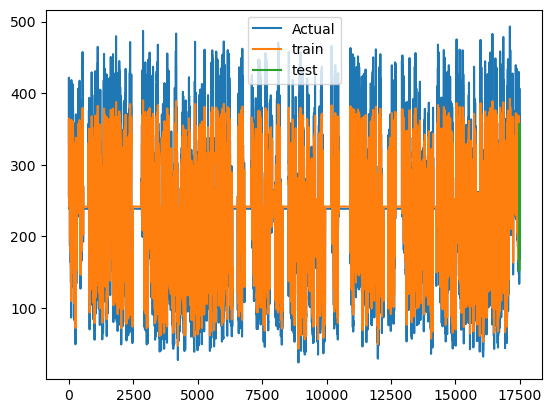

In [247]:

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Actual")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

In [282]:
LSTM_aqi_res=testPredict.flatten()
LSTM_aqi=list(LSTM_aqi_res[:24])
len(LSTM_aqi)

24

## LSTM Result

In [248]:
from sklearn.metrics import mean_absolute_percentage_error as mappe

In [391]:
# calculate root mean squared error
LSTM_mape = (mape(trainY[0], trainPredict[:,0]))
print('LSTM Train Score: %.2f MAPE' % (LSTM_trainScore))
LSTM_testScore = (mape(testY[0], testPredict[:,0]))
print('LSTM Test Score: %.2f MAPE' % (LSTM_testScore))

LSTM Train Score: 0.19 MAPE
LSTM Test Score: 243.36 MAPE


In [357]:
result_df=pd.DataFrame()
result_df["var"]=var_aqi
result_df["LSTM"]=testPredict.flatten()
result_df["xgbst"]=yhat
result_df["test"]=testY[0].flatten()

In [369]:
result_df["LSTM_test"]=testY[0]
result_df["xg_test"]=y

In [370]:
result_df

,var,LSTM,xgbst,test,LSTM_test,xg_test
Date,,,,,,
2019-12-30 01:00:00,239.614213,271.790527,211.100876,208.564098,208.564098,163.923077
2019-12-30 02:00:00,247.836171,216.284958,193.931030,163.923083,163.923083,133.589744
2019-12-30 03:00:00,253.620812,178.223999,120.028244,133.589733,133.589733,147.871795
2019-12-30 04:00:00,247.295982,152.079636,173.998123,147.871800,147.871800,205.820513
2019-12-30 05:00:00,242.417685,164.444214,177.378189,205.820505,205.820505,277.307692
2019-12-30 06:00:00,243.510319,213.955139,264.716919,277.307691,277.307691,210.206820
2019-12-30 07:00:00,239.955103,273.128937,210.670654,210.206818,210.206818,333.641026
2019-12-30 08:00:00,243.527404,217.679001,335.955597,333.641008,333.641008,405.242995
2019-12-30 09:00:00,241.925638,314.595337,365.599457,405.242967,405.242967,406.665195


In [394]:
#hybrid_mape=mape(df_hybrid["Actual"],df_hybrid["hybrid"])
xgbst_mape = (mape(result_df["LSTM_test"],result_df["LSTM"]))
print('Xg boost MAPE: %.2f MApE' % (xgbst_mape))

Xg boost MAPE: 0.19 MApE


In [395]:
#hybrid_mape=mape(df_hybrid["Actual"],df_hybrid["hybrid"])
lstm_mape = (mape(result_df["xg_test"],result_df["xgbst"]))
print('LSTM MAPE: %.2f MAPE' % (lstm_mape))

LSTM MAPE: 0.23 MAPE


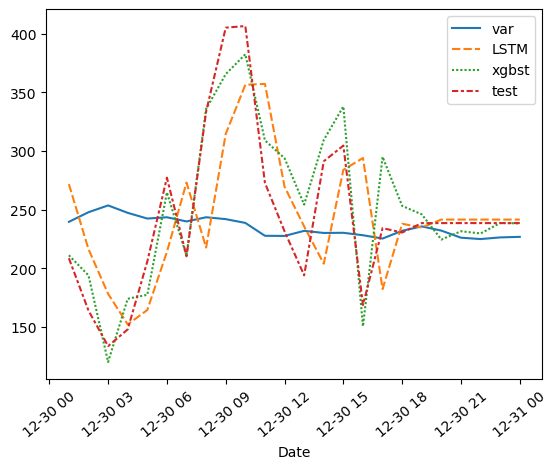

In [399]:
sns.lineplot(result_df[["var","LSTM","xgbst","test"]])
plt.xticks(rotation=40)
plt.show()

In [461]:
result_score_df=pd.DataFrame({"Model":["VAR","Xg_boost","LSTM"],
                              "MAPE":[var_mape,xgbst_mape,lstm_mape]})

In [456]:
result_score_df.index=result_score_df["Model"]
result_score_df=result_score_df.drop(["Model"],axis=1)
result_score_df

,MAPE
Model,
VAR,48.320000
Xg_boost,0.189247
LSTM,0.233251
